Pedro Ivo Vasconcelos - TP

## **Capítulo 7**

1) A simulação do modelo linearizado é realizada dentro de um loop 'for' que atualiza os estados e calcula os valores de pH. Neste trecho do arquivo simrk_ph_teste_ee:

<div style="border: 1px solid; padding: 10px;">

```python
for k in range(ini, len(T)):
    kc = (k - 1) * Ts // h
    x[:, k], pH[k] = simrk_pH(x[:, k - 1], u1[k], u2[k], h, t[kc], par, Kas, Ts)

    for i in range(7):
        xl[i, k] = Ad[i, i] * xl[i, k - 1] + Bd[i, 0] * du1[k] + Bd[i, 1] * du2[k]
    
    # Verificar se os valores são finitos antes de calcular as raízes
    coefficients = [1, (Kas[0] - (xl[1, k] + x0[1])), 
                    (Kas[0] * Kas[1] - Kas[0] * (xl[1, k] + x0[1]) - Kas[2] - Kas[0] * (xl[2, k] + x0[2])), 
                    -(Kas[0] * Kas[2] + Kas[0] * Kas[1] * (xl[1, k] + x0[1]) + 2 * Kas[0] * Kas[1] * (xl[2, k] + x0[2])), 
                    -Kas[0] * Kas[1] * Kas[2]]
    
    if all(np.isfinite(coefficients)):
        p = np.roots(coefficients)
        ch = np.max(np.real(p))
        pHl[k] = -np.log10(ch)
    else:
        pHl[k] = np.nan  # Definir como NaN se os coeficientes não forem finitos
```
</div>

O trecho do código realiza duas tarefas basicamente:
- Atualiza os estados xl usando as matrizes discretizadas Ad e Bd.
- Calcula o pH com base nos estados atualizados, utilizando os coeficientes de um polinômio cujas raízes são encontradas para determinar o pH.

2- O valor das variáveis de estado no ponto de operação é a matriz B, porque a matriz de estado tende a seguir a matriz de entrada com o tempo como demonstrado simulando o código a seguir onde o sistema tende a estabilizar no ponto de operação.

Ad = 
 [[0.03062724 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.79097987 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.79097987 0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]
Bd = 
 [[ 1.54492596e-01  1.54492596e-01]
 [ 2.47376224e-04 -2.48534277e-04]
 [-4.55745849e-05 -4.14761510e-05]
 [-3.03030303e-02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.03030303e-02]
 [ 0.00000000e+00  0.00000000e+00]]


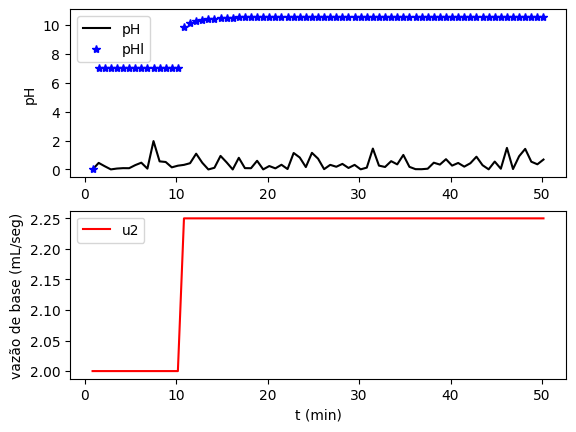

In [1]:
%run modelo_planta_ph/Modelo_de_pH_MATLAB_espaco_de_estados_linear/simrk_ph_teste_ee.py

3)